# AIM:

     To predict price range for mobile company based on features like battery power,ram,mobile weight,screen height,etc.

# Features given :

    • battery_power: Total energy a battery can store in one time measured in mAh
    • blue: Has bluetooth or not
    • clock_speed: speed at which microprocessor executes instructions
    • dual_sim: Has dual sim support or not
    • fc: Front Camera mega pixels
    • four_g: Has 4G or not
    • int_memory: Internal Memory in Gigabytes
    • m_dep: Mobile Depth in cm
    • mobile_wt: Weight of mobile phone
    • n_cores: Number of cores of processor
    • pc: Primary Camera mega pixels
    • px_height: Pixel Resolution Height
    • px_width: Pixel Resolution Width
    • ram: Random Access Memory in Mega Bytes
    • sc_h: Screen Height of mobile in cm
    • sc_w: Screen Width of mobile in cm
    • talk_time: longest time that a single battery charge will last when you are
    • three_g: Has 3G or not
    • touch_screen: Has touch screen or not
    • wifi: Has wifi or not
    • price_range: This is the target variable with value of 0(low cost), 1(medium cost),
    2(high cost) and 3(very high cost).

# Project outcome:

    This project gives scope to predict price range of mobile phone and how consumers are 
    showing interest towards mobile phones on basis of features and price.

# Applied Models :

    1)Logistic Regression
    2)KNN Classification
    3)SVM classifier with linear kernel
    4)SVM classifier with rbf kernel

# Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv('C:\\Users\\posah\\Desktop\\mobile_price_range_data.csv')

# Data Analysis

In [3]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
data.shape

(2000, 21)

# 1)Checking for null values

In [7]:
data.isnull().sum()       #TO SEE ANY NULL VALUES

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# Checking for duplicate values

In [8]:
data.duplicated().sum()

0

# Data Visualization & Analysis

BATTERY POWER vs PRICE RANGE

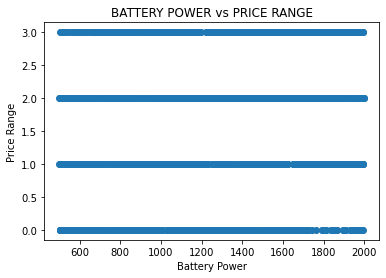

In [9]:
plt.scatter(data.battery_power,data.price_range)
plt.xlabel("Battery Power")
plt.ylabel("Price Range")
plt.title("BATTERY POWER vs PRICE RANGE")
plt.show()

BLUETOOTH vs PRICE RANGE

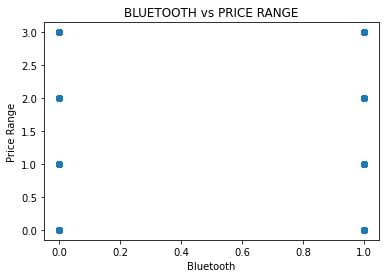

In [10]:
plt.scatter(data.blue,data.price_range)
plt.xlabel("Bluetooth")
plt.ylabel("Price Range")
plt.title("BLUETOOTH vs PRICE RANGE")
plt.show()

CLOCK SPEED vs PRICE RANGE

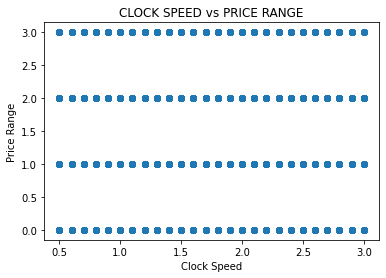

In [11]:
plt.scatter(data.clock_speed,data.price_range)
plt.xlabel("Clock Speed")
plt.ylabel("Price Range")
plt.title("CLOCK SPEED vs PRICE RANGE")
plt.show()

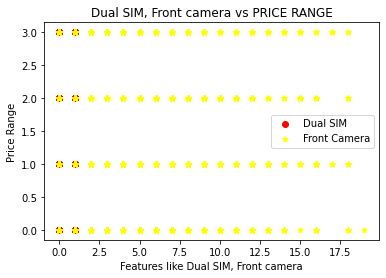

In [12]:
plt.scatter(data.dual_sim,data.price_range,marker='o',color='red',label='Dual SIM')
plt.scatter(data.fc,data.price_range,marker='*',color='yellow',label='Front Camera')
plt.xlabel("Features like Dual SIM, Front camera")
plt.ylabel("Price Range")
plt.legend()
plt.title("Dual SIM, Front camera vs PRICE RANGE")
plt.show()

INTERNAL MEMORY vs PRICE RANGE

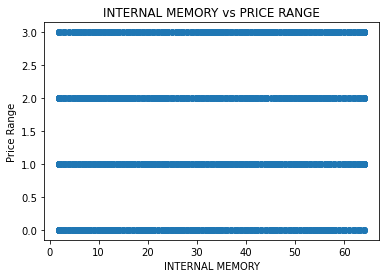

In [13]:
plt.scatter(data.int_memory,data.price_range)
plt.xlabel("INTERNAL MEMORY")
plt.ylabel("Price Range")
plt.title("INTERNAL MEMORY vs PRICE RANGE")
plt.show()

INTERNAL MEMORY vs PRICE RANGE

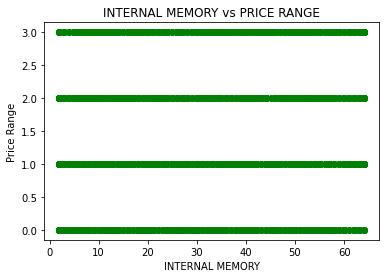

In [14]:
plt.scatter(data.int_memory,data.price_range,marker='o',color='green')
plt.xlabel("INTERNAL MEMORY")
plt.ylabel("Price Range")
plt.title("INTERNAL MEMORY vs PRICE RANGE")
plt.show()

PIXEL HEIGHT, PIXEL WIDTH vs PRICE RANGE

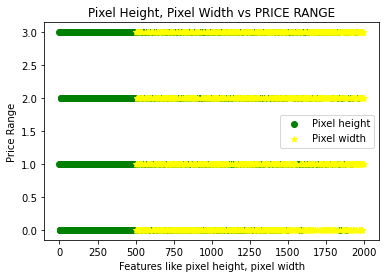

In [15]:
plt.scatter(data.px_height,data.price_range,marker='o',color='green',label='Pixel height')
plt.scatter(data.px_width,data.price_range,marker='*',color='yellow',label='Pixel width')
plt.xlabel("Features like pixel height, pixel width")
plt.ylabel("Price Range")
plt.legend()
plt.title("Pixel Height, Pixel Width vs PRICE RANGE")
plt.show()

RAM vs PRICE RANGE

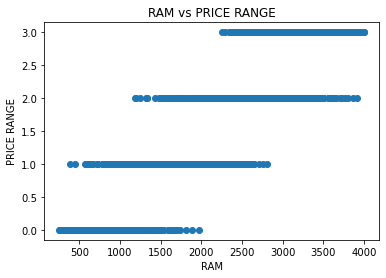

In [16]:
plt.scatter(data.ram,data.price_range)
plt.xlabel("RAM")
plt.ylabel("PRICE RANGE")
plt.title("RAM vs PRICE RANGE")
plt.show()

# X & Y array

In [17]:
x = data.iloc[:,:-1]    # x=data.drop('price_range',axis=1)
y = data.iloc[:,-1]     # y=data['price_range']
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(2000, 20)
(2000,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


# 2)Spliting data into training and testing

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1500, 20)
(500, 20)
(1500,)
(500,)


In [19]:
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [20]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

# 3a) CREATING AND TRAINING LOGISTIC REGRESSION MODEL

In [21]:
from sklearn.linear_model import LogisticRegression
m1 = LogisticRegression()

In [22]:
m1.fit(x_train,y_train)

C:\Users\posah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
print('Model Score',m1.score(x_train,y_train))

Model Score 0.6366666666666667


In [24]:
y_pred1 = m1.predict(x_test)
y_pred1

array([3, 3, 3, 1, 1, 3, 1, 3, 1, 2, 1, 1, 3, 0, 3, 0, 2, 1, 2, 1, 2, 0,
       3, 0, 3, 3, 1, 0, 3, 3, 3, 0, 3, 0, 3, 3, 1, 0, 1, 2, 1, 1, 0, 0,
       2, 0, 2, 1, 1, 3, 2, 0, 0, 3, 1, 2, 2, 0, 3, 3, 1, 3, 3, 2, 3, 3,
       0, 1, 0, 0, 3, 0, 2, 1, 2, 2, 0, 3, 1, 2, 1, 2, 2, 1, 2, 0, 3, 2,
       1, 1, 0, 3, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 0, 1, 3, 2, 3, 3, 2,
       0, 3, 0, 1, 1, 3, 2, 2, 1, 2, 3, 3, 0, 1, 3, 3, 0, 2, 0, 3, 2, 3,
       1, 1, 1, 1, 0, 0, 1, 1, 3, 2, 3, 0, 0, 1, 1, 2, 1, 1, 0, 1, 1, 3,
       1, 3, 0, 2, 1, 1, 0, 3, 1, 3, 0, 3, 2, 3, 0, 2, 0, 2, 0, 0, 1, 0,
       2, 3, 3, 1, 1, 3, 2, 2, 0, 2, 0, 3, 1, 3, 3, 2, 3, 1, 2, 2, 0, 3,
       2, 1, 1, 2, 0, 2, 0, 0, 3, 3, 1, 3, 3, 1, 2, 2, 3, 2, 2, 1, 2, 2,
       2, 0, 2, 0, 3, 3, 0, 1, 3, 2, 3, 1, 3, 1, 3, 2, 2, 1, 2, 3, 3, 0,
       3, 1, 1, 3, 1, 2, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 3, 1, 1, 3, 3, 0,
       2, 0, 1, 3, 3, 2, 3, 3, 2, 3, 1, 1, 1, 2, 3, 3, 0, 2, 3, 1, 2, 3,
       3, 3, 0, 2, 0, 0, 3, 0, 3, 2, 1, 2, 3, 2, 1,

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [26]:
m1_acc = accuracy_score(y_test,y_pred1)
print('Accuracy by LogisticRegression : ',m1_acc)

Accuracy by LogisticRegression :  0.64


In [27]:
m1_pre = precision_score(y_test,y_pred1,average='micro')
print('Precision by LogisticRegression : ',m1_pre)     # MEAN OF PRECISION FOR ALL PRICE RANGE

Precision by LogisticRegression :  0.64


In [28]:
m1_rec = recall_score(y_test,y_pred1,average='micro')
print('Recall by LogisticRegression : ',m1_rec)       # MEAN OF RECALL FOR ALL PRICE RANGE

Recall by LogisticRegression :  0.64


In [29]:
m1_f1 = f1_score(y_test,y_pred1,average='micro')
print('F1-score by LogisticRegression : ',m1_f1)      # MEAN OF F1 SCORE FOR ALL PRICE RANGE

F1-score by LogisticRegression :  0.64


In [30]:
from sklearn.metrics import confusion_matrix,classification_report

In [31]:
m1_cm = confusion_matrix(y_test,y_pred1)
print(m1_cm)
print(classification_report(y_test,y_pred1))

[[ 96  33   1   0]
 [ 18  64  31   4]
 [  0  32  55  38]
 [  0   1  22 105]]
              precision    recall  f1-score   support

           0       0.84      0.74      0.79       130
           1       0.49      0.55      0.52       117
           2       0.50      0.44      0.47       125
           3       0.71      0.82      0.76       128

    accuracy                           0.64       500
   macro avg       0.64      0.64      0.63       500
weighted avg       0.64      0.64      0.64       500



# 3b) CREATING AND TRAINING KNN algoritm(K-Nearest Neighbours Algorithm)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
m2 = KNeighborsClassifier(n_neighbors=10)
m2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [34]:
print('Training score',m2.score(x_train,y_train))     #ACCURATE SCORES
print('Testing score',m2.score(x_test,y_test))

Training score 0.9453333333333334
Testing score 0.922


In [35]:
y_pred2=m2.predict(x_test)
print(y_pred2)

[2 2 3 1 3 3 0 3 1 1 2 0 3 0 3 0 3 1 1 1 1 0 3 1 3 3 1 0 2 2 3 0 3 0 3 2 0
 0 1 2 0 0 0 1 2 0 2 0 1 3 1 0 0 2 1 0 3 0 3 3 0 1 3 2 3 3 0 0 0 0 3 0 2 1
 3 2 0 3 0 2 0 1 3 1 2 0 2 2 1 1 0 3 0 1 0 0 0 2 1 0 2 2 2 1 1 2 3 3 2 1 0
 3 0 1 1 3 3 2 1 3 2 1 0 1 3 3 0 1 0 3 2 3 1 1 1 0 0 0 2 0 3 1 2 0 0 2 1 3
 1 0 1 0 1 2 2 3 0 2 2 2 1 3 1 3 0 3 2 3 0 2 0 3 0 0 1 0 2 2 1 0 2 3 1 3 0
 2 0 3 1 3 3 3 2 1 2 1 0 3 1 0 1 2 0 2 0 0 3 2 0 3 3 1 1 3 3 1 2 0 2 1 3 0
 3 0 3 2 1 0 3 2 2 1 3 2 3 2 2 2 3 2 2 1 3 1 0 3 1 2 0 0 0 0 0 1 2 0 2 0 3
 1 1 3 3 0 3 0 2 3 1 2 3 2 2 3 1 1 2 1 3 3 0 2 3 1 1 2 3 3 0 1 0 0 2 0 3 3
 1 3 2 2 1 1 1 2 0 2 1 1 1 3 3 2 3 1 1 1 0 0 1 0 0 0 2 0 1 1 3 0 1 1 3 0 3
 0 1 1 2 3 1 1 3 3 2 3 0 3 3 2 3 2 2 0 1 1 1 3 2 0 0 3 0 2 1 0 2 0 0 2 3 2
 3 3 0 0 2 1 1 2 1 2 1 0 3 0 0 0 3 2 3 3 0 3 2 3 2 1 3 0 0 2 3 2 0 0 3 0 1
 2 0 1 3 1 1 2 0 0 2 2 1 3 1 2 3 1 3 3 3 2 1 3 3 0 2 0 2 0 0 2 1 1 1 2 0 2
 2 1 3 2 2 0 1 1 1 3 2 3 0 0 3 1 1 3 2 1 0 2 0 2 1 1 0 1 3 0 2 0 0 0 2 3 1
 2 0 0 1 3 0 1 1 2 3 0 1 

In [36]:
m2_cm=confusion_matrix(y_test,y_pred2)
print(m2_cm)
print(classification_report(y_test,y_pred2))

[[129   1   0   0]
 [  8 107   2   0]
 [  0  15 106   4]
 [  0   0   9 119]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       130
           1       0.87      0.91      0.89       117
           2       0.91      0.85      0.88       125
           3       0.97      0.93      0.95       128

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500



In [37]:
m2_acc = accuracy_score(y_test,y_pred2)
print('Accuracy by KNN : ',m2_acc)

Accuracy by KNN :  0.922


In [38]:
m2_pre = precision_score(y_test,y_pred2,average='micro')
print('Precision by KNN : ',m2_pre)

Precision by KNN :  0.922


In [39]:
m2_rec = recall_score(y_test,y_pred2,average='micro')
print('Recall by KNN : ',m2_rec)

Recall by KNN :  0.922


In [40]:
m2_f1 = f1_score(y_test,y_pred2,average='micro')
print('F1-score by KNN : ',m2_f1)

F1-score by KNN :  0.922


# 3c) CREATING AND TRAINING SVM CLASSIFIER WITH
#        (i) LINEAR KERNEL

In [41]:
from sklearn.svm import SVC

In [42]:
m3 = SVC(kernel='linear',C=1)
m3.fit(x_train,y_train)

SVC(C=1, kernel='linear')

In [43]:
print('Training score : ',m3.score(x_train,y_train))   #ACCURATE
print('Testing score : ',m3.score(x_test,y_test))

Training score :  0.9913333333333333
Testing score :  0.978


In [44]:
y_pred3 = m3.predict(x_test)
print(y_pred3)

[3 2 3 1 3 3 0 3 1 2 2 0 3 0 3 0 3 1 1 1 1 0 3 1 3 3 1 0 2 2 3 0 3 0 3 2 0
 0 1 2 0 0 0 1 2 0 2 0 1 3 1 0 0 2 1 0 3 0 3 3 0 1 3 2 3 3 0 0 0 0 3 0 3 1
 3 2 0 3 0 2 0 1 3 1 2 0 2 2 1 1 0 3 0 1 0 0 0 2 1 1 3 2 2 1 1 2 3 3 2 2 0
 3 0 1 1 3 3 2 1 3 3 1 0 1 3 3 0 1 0 3 2 3 1 1 1 0 0 0 2 0 3 1 3 0 0 2 1 3
 1 0 1 0 1 2 1 3 0 2 2 2 0 3 1 3 0 3 2 3 0 2 0 3 0 0 1 0 2 3 1 0 2 3 1 3 0
 2 0 3 1 2 3 3 2 1 2 2 0 3 1 0 2 2 0 2 0 0 3 2 0 3 3 1 1 2 3 1 2 0 2 1 3 0
 3 0 3 2 1 0 3 2 2 1 3 2 3 2 2 2 3 2 2 1 3 1 1 3 1 2 0 0 0 0 0 1 2 0 2 0 3
 1 2 3 3 0 3 0 2 3 1 2 3 2 2 3 1 1 2 1 3 3 0 2 3 1 1 2 3 3 0 1 0 0 2 0 3 3
 2 3 2 2 2 1 1 2 0 2 1 2 1 3 3 3 3 1 1 1 0 0 1 0 0 1 2 0 1 1 3 0 2 1 3 0 3
 0 1 1 3 3 1 1 3 3 2 3 0 2 3 2 3 2 3 0 1 1 1 3 3 0 0 3 0 2 1 0 2 0 0 2 3 2
 3 3 0 0 2 1 1 2 1 2 1 0 3 0 0 0 3 2 3 3 0 3 2 3 2 1 3 0 0 2 3 2 1 0 3 1 1
 2 0 1 3 1 1 2 0 0 2 2 1 3 1 2 3 1 3 3 3 2 1 3 3 0 2 0 2 0 0 2 1 1 1 2 0 2
 2 1 3 2 2 0 1 1 1 3 3 3 0 0 3 1 1 3 2 1 0 2 0 1 1 1 0 1 3 0 2 0 0 0 2 3 1
 2 0 0 1 3 0 1 1 2 3 1 1 

In [45]:
m3_cm = confusion_matrix(y_test,y_pred3)
print(m3_cm)
print(classification_report(y_test,y_pred3))

[[130   0   0   0]
 [  2 115   0   0]
 [  0   5 116   4]
 [  0   0   0 128]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       130
           1       0.96      0.98      0.97       117
           2       1.00      0.93      0.96       125
           3       0.97      1.00      0.98       128

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500



In [46]:
m3_acc = accuracy_score(y_test,y_pred3)
print('Accuracy by SVM classifier with linear kernel : ',m3_acc)

Accuracy by SVM classifier with linear kernel :  0.978


In [47]:
m3_pre = accuracy_score(y_test,y_pred3)
print('Precision by SVM classifier with linear kernel : ',m3_pre)

Precision by SVM classifier with linear kernel :  0.978


In [48]:
m3_rec = recall_score(y_test,y_pred3,average='micro')
print('Recall by SVM classifier with linear kernel : ',m3_rec)

Recall by SVM classifier with linear kernel :  0.978


In [49]:
m3_f1 = f1_score(y_test,y_pred3,average='micro')
print('F1 by SVM classifier with linear kernel : ',m3_f1)

F1 by SVM classifier with linear kernel :  0.978


# (ii) rbf KERNEL

In [50]:
m4 = SVC(kernel='rbf',gamma=0.01,C=1)
m4.fit(x_train,y_train)

SVC(C=1, gamma=0.01)

In [51]:
print('Training Score : ',m4.score(x_train,y_train))    #ACCURATE
print('Testing Score : ',m4.score(x_test,y_test))

Training Score :  1.0
Testing Score :  0.234


In [52]:
y_pred4 = m4.predict(x_test)
print(y_pred4)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [53]:
m4_cm=confusion_matrix(y_test,y_pred4)
print(m4_cm)
print(classification_report(y_test,y_pred4))

[[  0 130   0   0]
 [  0 117   0   0]
 [  0 125   0   0]
 [  0 128   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       130
           1       0.23      1.00      0.38       117
           2       0.00      0.00      0.00       125
           3       0.00      0.00      0.00       128

    accuracy                           0.23       500
   macro avg       0.06      0.25      0.09       500
weighted avg       0.05      0.23      0.09       500



C:\Users\posah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\posah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\posah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
m4_acc = accuracy_score(y_test,y_pred4)
print('Accuracy by SVM classifier with rbf kernel : ',m4_acc)

Accuracy by SVM classifier with rbf kernel :  0.234


In [55]:
m4_pre = precision_score(y_test,y_pred4,average='micro')
print('Precision by SVM classifier with rbf kernel : ',m4_pre)

Precision by SVM classifier with rbf kernel :  0.234


In [56]:
m4_rec = recall_score(y_test,y_pred4,average='micro')
print('Recall by SVM classifier with rbf kernel : ',m4_rec)

Recall by SVM classifier with rbf kernel :  0.234


In [57]:
m4_f1 = f1_score(y_test,y_pred4,average='micro')
print('F1-score by SVM classifier with rbf kernel : ',m4_f1)

F1-score by SVM classifier with rbf kernel :  0.234


# PLOTING GRAPH TO KNOW WHICH ALGORITHM IS BEST TO PREDICT PRICE RANGE

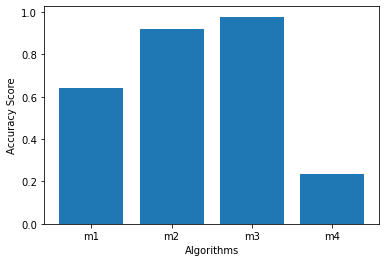

In [58]:
plt.bar(x=['m1','m2','m3','m4'],height=[m1_acc,m2_acc,m3_acc,m4_acc])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Score')
plt.show()

Here m1 is Logisitic Regression
     m2 is KNN Algorithm
     m3 is SVM with linear kernel
     m4 is SVM with rbf kernel
By observing graph plotted above we come into conclude that SVM with linear kernel model gives best
performs. Hence,we are predicting our price range of mobile with SVM linear kernel for given data.

# 4) PREDECTING PRICE RANGE FOR TEST DATA BY SVM CLASSIFIER WITH LINEAR KERNEL

In [59]:
predi = m3.predict(x_test)
print(predi)

[3 2 3 1 3 3 0 3 1 2 2 0 3 0 3 0 3 1 1 1 1 0 3 1 3 3 1 0 2 2 3 0 3 0 3 2 0
 0 1 2 0 0 0 1 2 0 2 0 1 3 1 0 0 2 1 0 3 0 3 3 0 1 3 2 3 3 0 0 0 0 3 0 3 1
 3 2 0 3 0 2 0 1 3 1 2 0 2 2 1 1 0 3 0 1 0 0 0 2 1 1 3 2 2 1 1 2 3 3 2 2 0
 3 0 1 1 3 3 2 1 3 3 1 0 1 3 3 0 1 0 3 2 3 1 1 1 0 0 0 2 0 3 1 3 0 0 2 1 3
 1 0 1 0 1 2 1 3 0 2 2 2 0 3 1 3 0 3 2 3 0 2 0 3 0 0 1 0 2 3 1 0 2 3 1 3 0
 2 0 3 1 2 3 3 2 1 2 2 0 3 1 0 2 2 0 2 0 0 3 2 0 3 3 1 1 2 3 1 2 0 2 1 3 0
 3 0 3 2 1 0 3 2 2 1 3 2 3 2 2 2 3 2 2 1 3 1 1 3 1 2 0 0 0 0 0 1 2 0 2 0 3
 1 2 3 3 0 3 0 2 3 1 2 3 2 2 3 1 1 2 1 3 3 0 2 3 1 1 2 3 3 0 1 0 0 2 0 3 3
 2 3 2 2 2 1 1 2 0 2 1 2 1 3 3 3 3 1 1 1 0 0 1 0 0 1 2 0 1 1 3 0 2 1 3 0 3
 0 1 1 3 3 1 1 3 3 2 3 0 2 3 2 3 2 3 0 1 1 1 3 3 0 0 3 0 2 1 0 2 0 0 2 3 2
 3 3 0 0 2 1 1 2 1 2 1 0 3 0 0 0 3 2 3 3 0 3 2 3 2 1 3 0 0 2 3 2 1 0 3 1 1
 2 0 1 3 1 1 2 0 0 2 2 1 3 1 2 3 1 3 3 3 2 1 3 3 0 2 0 2 0 0 2 1 1 1 2 0 2
 2 1 3 2 2 0 1 1 1 3 3 3 0 0 3 1 1 3 2 1 0 2 0 1 1 1 0 1 3 0 2 0 0 0 2 3 1
 2 0 0 1 3 0 1 1 2 3 1 1 

ADDING TEST PREDICTION PRICE TO x_test

In [60]:
x_test['price_pred']=predi
x_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_pred
52,1654,1,1.5,1,0,1,43,0.3,109,2,...,546,629,3112,12,5,10,1,1,0,3
781,1368,0,3.0,1,10,0,50,0.2,97,7,...,698,829,2496,13,6,5,0,1,1,2
66,1358,1,0.5,0,11,1,36,0.3,155,4,...,1565,1858,3068,9,4,4,1,1,0,3
269,1281,1,2.3,1,0,0,28,0.3,148,1,...,1285,1617,1129,12,1,6,0,1,0,1
107,1657,1,2.4,0,3,0,42,0.1,198,5,...,1770,1796,2597,18,1,14,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509,1972,1,1.6,0,0,0,48,0.5,92,8,...,290,804,2872,7,2,11,1,0,1,3
767,1853,0,0.5,1,1,0,27,0.3,197,6,...,985,1005,1973,10,2,8,1,0,1,2
1407,1617,0,1.5,0,1,1,63,0.7,111,2,...,274,1079,2754,19,10,8,1,1,1,2
1797,873,1,0.5,1,6,0,8,0.6,152,7,...,1257,1411,575,15,8,7,1,0,1,0


# 5) COMPUTING CONFUSION MATRIX AND CLASSIFICATION REPORT FOR SVM CLASSIFIER WITH RBF KERNEL

In [61]:
m3_cm = confusion_matrix(y_test,y_pred3)
print(m3_cm)
print(classification_report(y_test,y_pred3))

[[130   0   0   0]
 [  2 115   0   0]
 [  0   5 116   4]
 [  0   0   0 128]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       130
           1       0.96      0.98      0.97       117
           2       1.00      0.93      0.96       125
           3       0.97      1.00      0.98       128

    accuracy                           0.98       500
   macro avg       0.98      0.98      0.98       500
weighted avg       0.98      0.98      0.98       500



• Precision is the ratio of true positive to sum of true positive and false positive of ML model predicte as Positive value.
    
• Recall is the ratio of true positive to sum of true positive and false negative for Actual positve values.
    
• F1-score is harmonic mean of precision and recall which is value 0.99 for low cost, which is nearear to 1, that says that better expected performance model(SVM Classifier with Linear Kernel).

• Support is the number which says the actual occurrence of given data set. Here supporting values for Low cost is 130, Medium cost is 117, High cost is 125, Very high Cost is 128 number of values supporting

In [78]:
x1 = {'Accuracy':[m1_acc,m2_acc,m3_acc,m4_acc],
      'Precision (mean)':[m1_pre,m2_pre,m3_pre,m4_pre],   # MEAN OF ALL COST RANGE
        'Recall (mean)':[m1_rec,m2_rec,m3_rec,m4_rec],
         'F1-score (mean)':[m1_f1,m2_f1,m3_f1,m4_f1]}
x2 = ['Logistic Regression','KNN','SVM with Linear Kernel','SVM with rbf Kernel']
df=pd.DataFrame(x1,x2)
df

,Accuracy,Precision (mean),Recall (mean),F1-score (mean)
Logistic Regression,0.608,0.608,0.608,0.608
KNN,0.932,0.932,0.932,0.932
SVM with Linear Kernel,0.974,0.974,0.974,0.974
SVM with rbf Kernel,0.246,0.246,0.246,0.246


# CONCLUSION

On computating it have been concluded that SVM Classifier with Linear Kernel is best model to predict
price range of mobile phone for given data.